In [1]:
library(stm)

stm v1.3.3 () successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


In [2]:
poliblogs<-read.csv("/Users/ninawang/Thesis/remote/THESIS2019/PART1/TopicModel/STM/stm_data_media_outlet.csv",header=TRUE)


In [4]:
processed <- textProcessor(poliblogs$documents, metadata = poliblogs)
out <- prepDocuments(processed$documents, processed$vocab, processed$meta)
docs <- out$documents
vocab <- out$vocab
meta <-out$meta

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 4117 of 18573 terms (4117 of 436798 tokens) due to frequency 
Your corpus now has 2010 documents, 14456 terms and 432681 tokens.

In [5]:
First_STM <- stm(documents = out$documents, vocab = out$vocab,
              K = 30, prevalence =~ rating + outlet,
              max.em.its = 75, data = out$meta,
              init.type = "Spectral", verbose = FALSE)

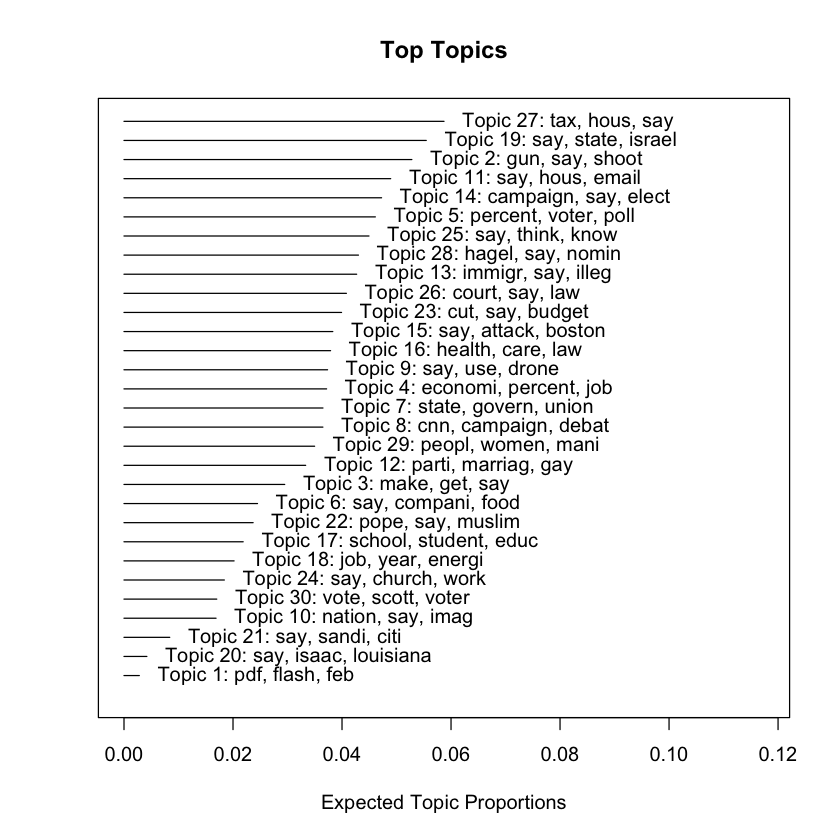

In [6]:
plot(First_STM)

In [32]:
# https://www.rdocumentation.org/packages/stm/versions/1.3.3/topics/estimateEffect

predict_topics<-estimateEffect(formula = 1:1~rating+outlet, stmobj = First_STM, metadata = out$meta, uncertainty = "Global")



In [14]:
# cloud(First_STM, topic=7)

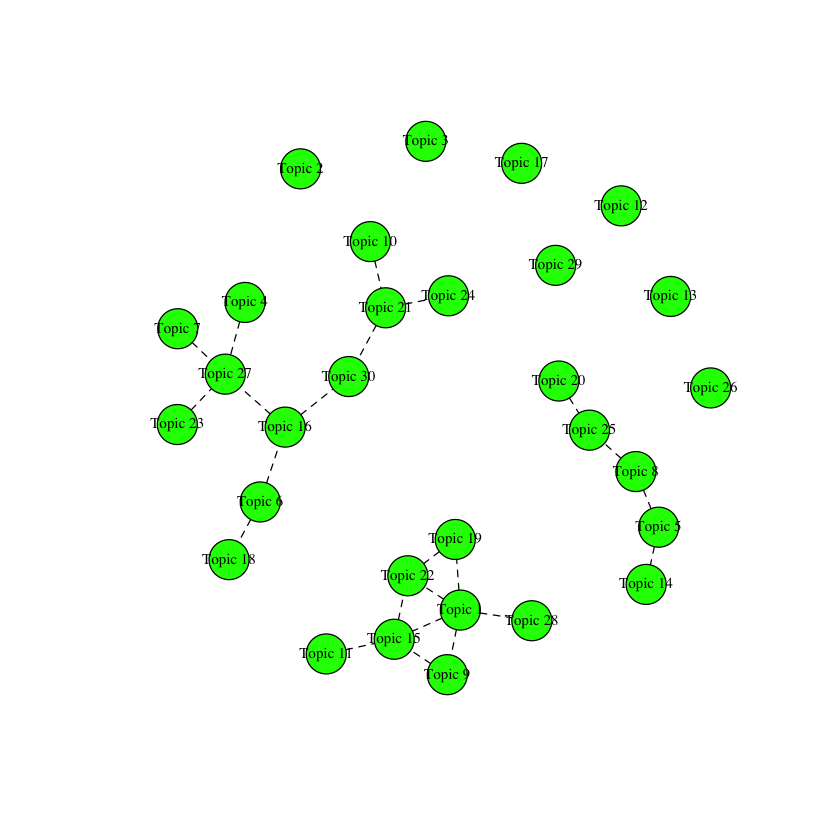

In [15]:
mod.out.corr <- topicCorr(First_STM)
plot(mod.out.corr)

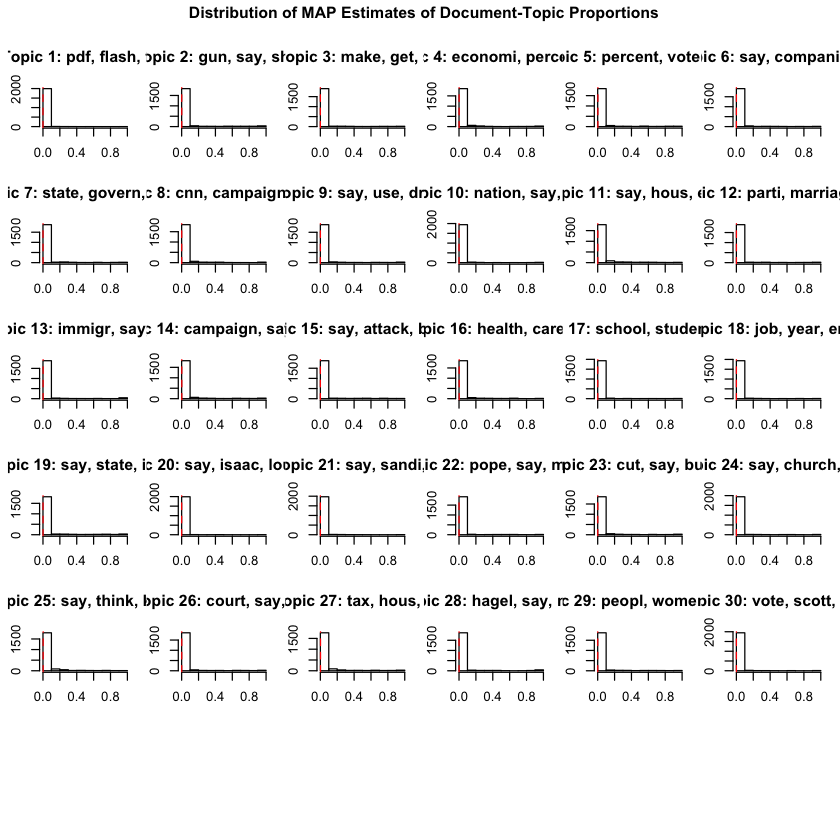

In [16]:
plot(First_STM, type="hist")

In [37]:
summary(First_STM)

A topic model with 30 topics, 2010 documents and a 14456 word dictionary.


Topic 1 Top Words:
 	 Highest Prob: pdf, flash, feb, apr, jan, hawkin, awr 
 	 FREX: pdf, awr, apr, dec, jun, hawkin, flash 
 	 Lift: dec, awr, jun, seantor, donaho, apr, pdf 
 	 Score: pdf, flash, feb, oct, apr, dec, awr 
Topic 2 Top Words:
 	 Highest Prob: gun, say, shoot, state, law, bill, weapon 
 	 FREX: lanza, gunman, newtown, gun, nra, firearm, rifl 
 	 Lift: adventist, alexa, anguish, antonia, arapaho, arulanandam, asperg 
 	 Score: gun, lanza, newtown, firearm, weapon, nra, rifl 
Topic 3 Top Words:
 	 Highest Prob: make, get, say, year, first, take, print 
 	 FREX: codi, gridiron, print, digit, printer, hollywood, dressag 
 	 Lift: aba, adh, ahistor, alessandra, alt, ancien, antoinett 
 	 Score: codi, pinterest, print, gridiron, printer, retro, kook 
Topic 4 Top Words:
 	 Highest Prob: economi, percent, job, econom, say, report, spend 
 	 FREX: wage, economist, gdp, minimum, unemploy, growth, recess 
 	 Lift: adp, bullard, filet, gluskin, groll, jec, oecd 
 	 Score: economist,

In [61]:
predict_topics<-estimateEffect(formula = 1:30~rating+outlet, stmobj = First_STM, metadata = out$meta, uncertainty = "Global")


In [62]:
summary(predict_topics)


Call:
estimateEffect(formula = 1:30 ~ rating + outlet, stmobj = First_STM, 
    metadata = out$meta, uncertainty = "Global")


Topic 1:

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        0.024660   0.005579   4.420 1.04e-05 ***
ratingright                       -0.001105   0.001675  -0.660 0.509383    
outletCNN2012-2013                -0.023119   0.006245  -3.702 0.000220 ***
outletFOX2012-2013                -0.024020   0.005924  -4.055 5.20e-05 ***
outletMSN2012-2013                -0.023028   0.007459  -3.087 0.002046 ** 
outletNATIONALREVIEW2012-2013     -0.020985   0.005668  -3.702 0.000219 ***
outletNPR2012-2013                -0.023860   0.006830  -3.493 0.000487 ***
outletNYT-OPINION2012-2013        -0.023942   0.006037  -3.966 7.58e-05 ***
outletREUTERS-POLITICS2012-2013   -0.023887   0.006103  -3.914 9.38e-05 ***
outletSLATE2012-2013              -0.019175   0.007506  -2.555 0.010704 *  
outletWASHIN

Topic 19 Top Words:
 	 Highest Prob: say, state, israel, unit, war, north, countri 
 	 FREX: netanyahu, korea, syria, palestinian, isra, assad, missil 
 	 Lift: ansf, atid, bethlehem, bloodbath, bloodsh, crap, doha 
 	 Score: korea, syria, israel, palestinian, iran, isra, assad 

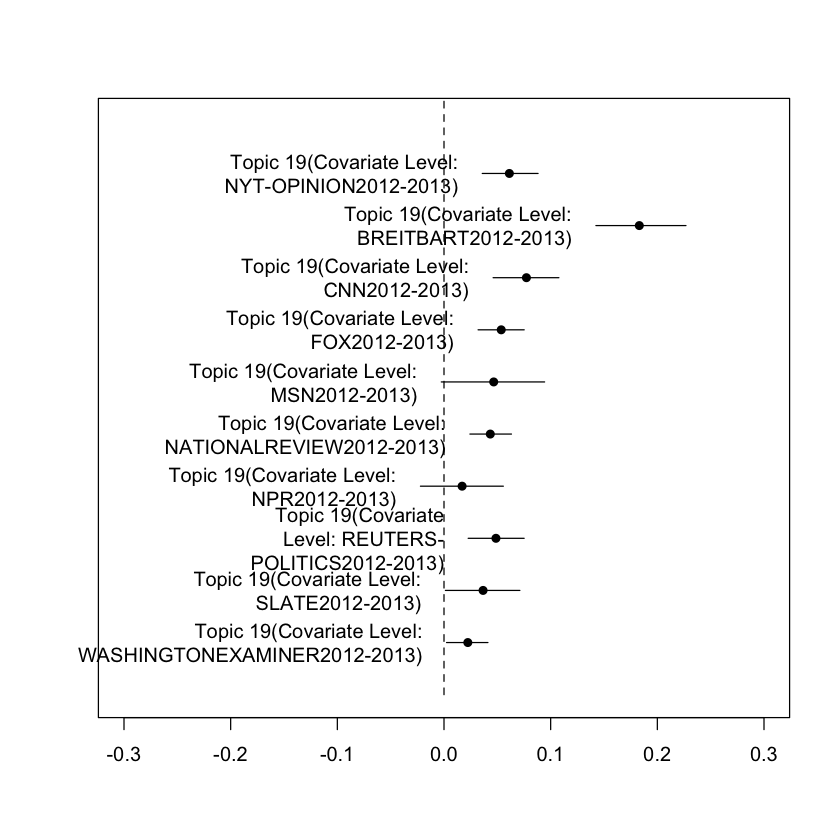

In [71]:
n = 19
# interesting: 11,12,13,17
plot(predict_topics, method="pointestimate",covariate="outlet",xlim=c(-.3,.3), topics=c(n))
labelTopics(First_STM, topic=n)


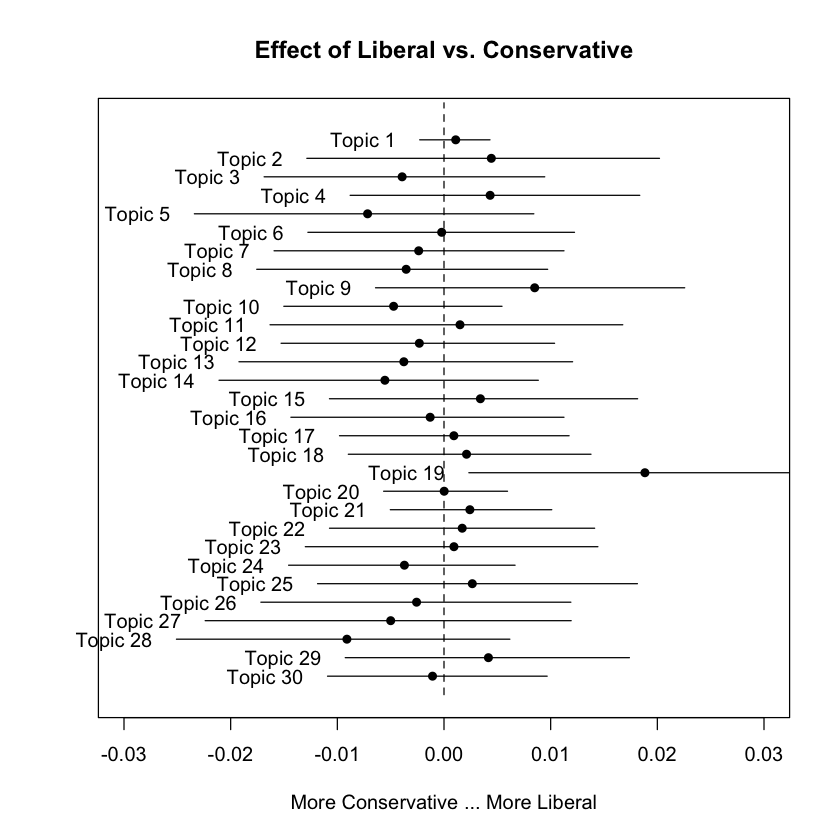

In [70]:
plot(predict_topics, covariate = "rating", topics = 1:30,
 model = First_STM, method = "difference",
 cov.value1 = "left", cov.value2 = "right",
 xlab = "More Conservative ... More Liberal",
 main = "Effect of Liberal vs. Conservative",
 xlim = c(-.03, .03), labeltype = "custom",
 custom.labels = paste("Topic",1:30))